Importing Libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install catboost
import catboost as cb


     -------------------------------------- 101.0/101.0 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

Reading data

In [5]:
df=pd.read_csv('PUBG_Game_Prediction_data.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
df.shape

(4446966, 29)

In [9]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [10]:
df.drop(2744604,inplace=True)


In [11]:
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


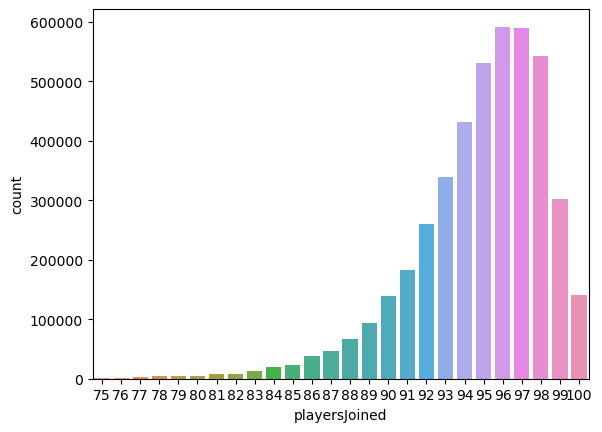

In [12]:
sns.countplot(df[df['playersJoined']>=75]['playersJoined'])
plt.show()

Analyzing data

In [13]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))
df[df['killswithoutMoving'] == True].head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [14]:
df[df['killswithoutMoving'] == True].shape


(1535, 32)

In [15]:
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)


In [16]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

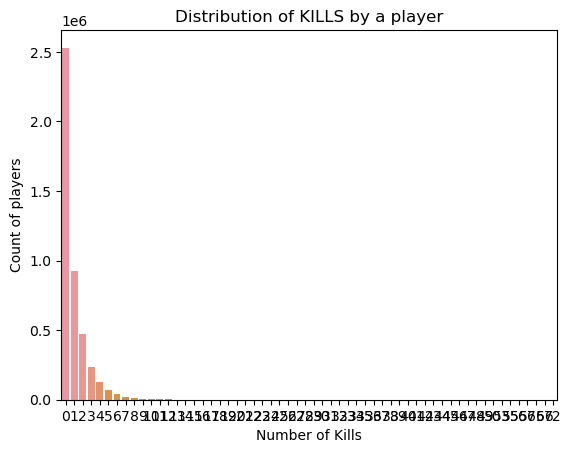

In [17]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()


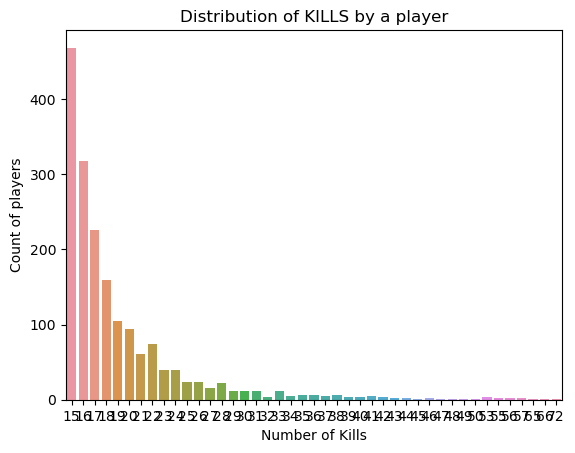

In [18]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()


In [19]:
df[df['kills'] > 20].shape


(417, 32)

In [20]:
df.drop(df[df['kills'] > 20].index, inplace = True)


In [21]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

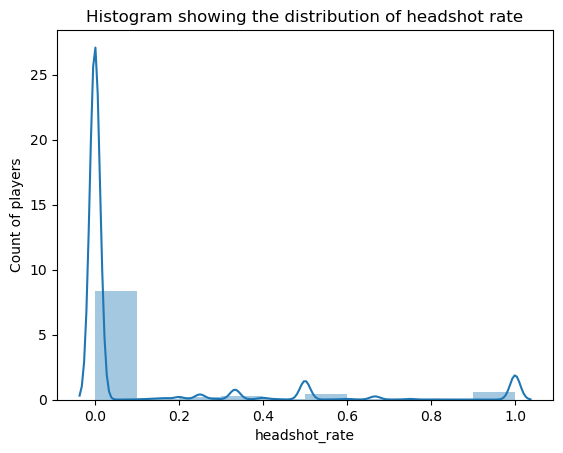

In [22]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [23]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape


(187, 33)

In [24]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

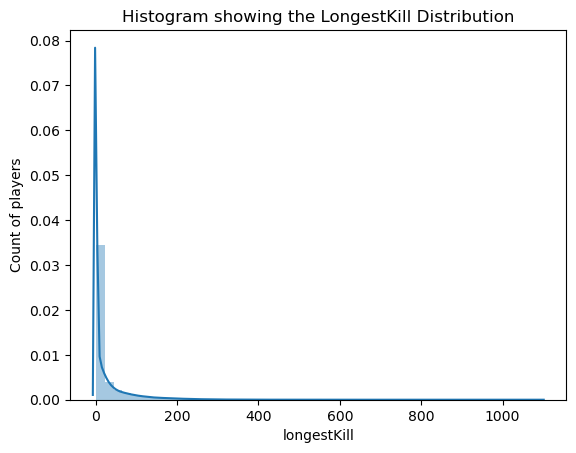

In [25]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()


In [26]:
df[df['longestKill']>=500].shape


(1747, 33)

In [27]:
df.drop(df[df['longestKill']>=500].index, inplace = True)


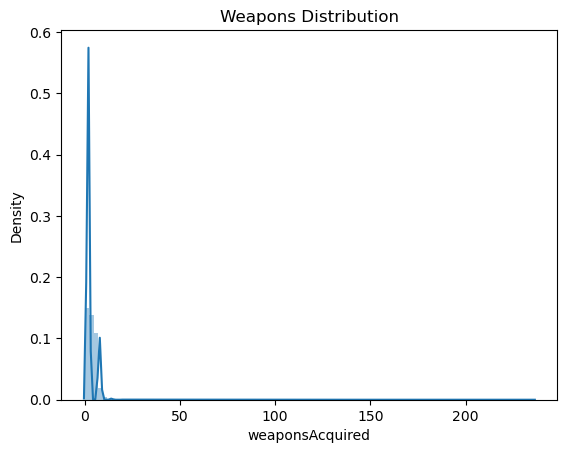

In [28]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()


In [29]:
df[df['weaponsAcquired']>=15].shape


(6809, 33)

In [30]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

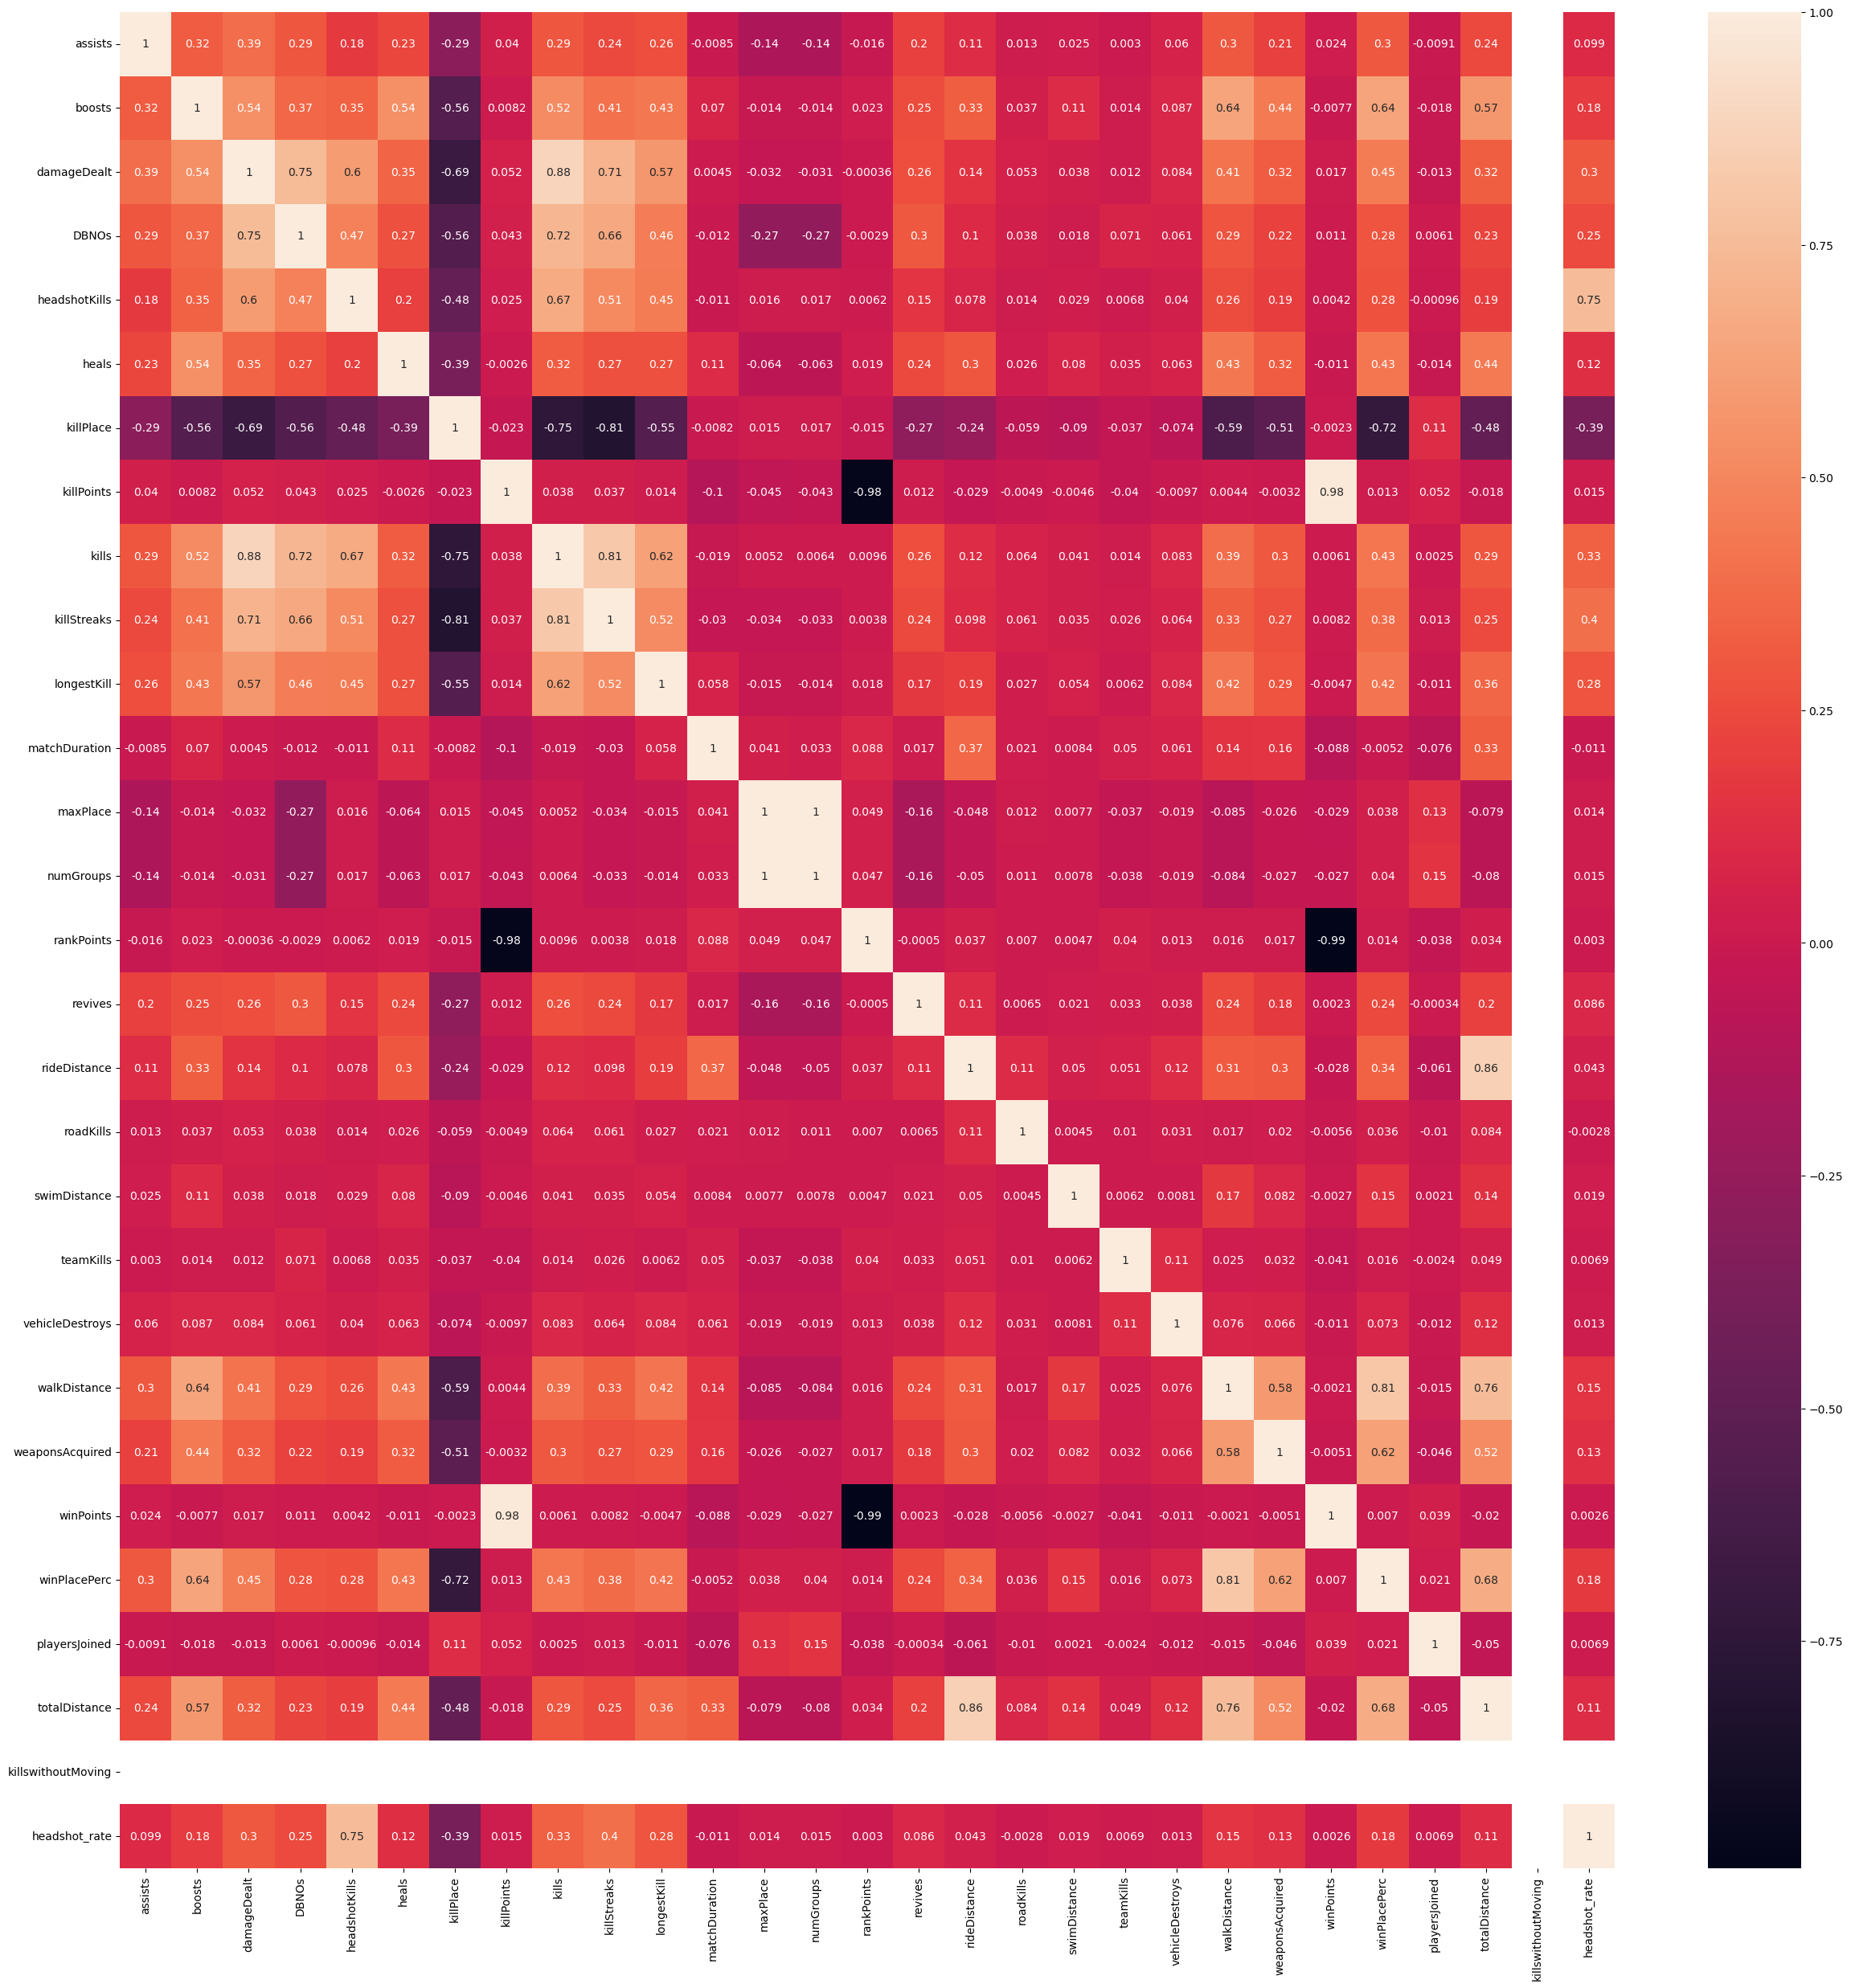

In [31]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

# Feature Engineering


In [32]:
normalising_factor = (100 - df['playersJoined']/100)+1


In [33]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [34]:
df.columns


Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [37]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])


In [38]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# ML-CATBOOST MODEL


In [39]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [40]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [41]:
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [42]:
x.head()


,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [43]:
features = x.columns

In [44]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))


In [45]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582937,-0.384018,0.449345,1.172485,-0.765100,-0.459622,-0.732886,-1.212390,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
1,-0.582937,-0.384018,0.340055,-0.804728,-0.765100,-0.459622,-0.775859,0.803564,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
2,-0.582937,-0.384018,-0.024245,-0.804728,-0.765100,-0.459622,0.169557,0.813067,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,-0.808936,0.0
3,-0.582937,-0.384018,0.995795,-0.804728,-0.765100,-0.459622,-0.560992,0.700391,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,-0.370797,-0.405071,1.236192,0.0
4,-0.582937,-0.384018,-0.097105,-0.804728,0.647633,0.727371,2.232284,0.906738,-0.049567,-0.142509,...,-0.033604,-0.005244,-0.013803,-0.008292,-0.054367,-0.206514,2.696896,-0.405071,-0.808936,0.0


In [46]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [47]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 40) (3105414,)
(1330892, 40) (1330892,)


In [48]:
import catboost as cb
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [49]:
model = cb.CatBoostRegressor(loss_function='RMSE')


In [50]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}
model.grid_search(grid, train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 308ms	remaining: 30.5s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 442ms	remaining: 21.7s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 596ms	remaining: 19.3s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 752ms	remaining: 18s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 908ms	remaining: 17.2s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 1.04s	remaining: 16.3s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 1.18s	remaining: 15.6s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 1.32s	remaining: 15.1s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 1.46s	remaining: 14.8s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 1.6s	remaining: 14.4s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 1.75s	remaining: 14.1s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765 (1

94:	learn: 0.1398785	test: 0.1399700	best: 0.1399700 (94)	total: 14.1s	remaining: 744ms
95:	learn: 0.1394478	test: 0.1395405	best: 0.1395405 (95)	total: 14.3s	remaining: 595ms
96:	learn: 0.1390753	test: 0.1391697	best: 0.1391697 (96)	total: 14.4s	remaining: 446ms
97:	learn: 0.1387199	test: 0.1388151	best: 0.1388151 (97)	total: 14.5s	remaining: 297ms
98:	learn: 0.1383766	test: 0.1384732	best: 0.1384732 (98)	total: 14.7s	remaining: 148ms
99:	learn: 0.1380397	test: 0.1381367	best: 0.1381367 (99)	total: 14.8s	remaining: 0us

bestTest = 0.1381366755
bestIteration = 99

0:	loss: 0.1381367	best: 0.1381367 (0)	total: 17.2s	remaining: 4m 18s
0:	learn: 0.5126068	test: 0.5124096	best: 0.5124096 (0)	total: 159ms	remaining: 15.8s
1:	learn: 0.4671679	test: 0.4669991	best: 0.4669991 (1)	total: 305ms	remaining: 14.9s
2:	learn: 0.4264429	test: 0.4262951	best: 0.4262951 (2)	total: 460ms	remaining: 14.9s
3:	learn: 0.3902182	test: 0.3900853	best: 0.3900853 (3)	total: 601ms	remaining: 14.4s
4:	learn: 0.358

88:	learn: 0.1174285	test: 0.1176647	best: 0.1176647 (88)	total: 12.4s	remaining: 1.53s
89:	learn: 0.1171031	test: 0.1173483	best: 0.1173483 (89)	total: 12.5s	remaining: 1.39s
90:	learn: 0.1170075	test: 0.1172519	best: 0.1172519 (90)	total: 12.7s	remaining: 1.25s
91:	learn: 0.1169191	test: 0.1171636	best: 0.1171636 (91)	total: 12.8s	remaining: 1.11s
92:	learn: 0.1168242	test: 0.1170669	best: 0.1170669 (92)	total: 12.9s	remaining: 973ms
93:	learn: 0.1167374	test: 0.1169829	best: 0.1169829 (93)	total: 13.1s	remaining: 833ms
94:	learn: 0.1166427	test: 0.1168850	best: 0.1168850 (94)	total: 13.2s	remaining: 694ms
95:	learn: 0.1165224	test: 0.1167628	best: 0.1167628 (95)	total: 13.3s	remaining: 555ms
96:	learn: 0.1164136	test: 0.1166544	best: 0.1166544 (96)	total: 13.4s	remaining: 416ms
97:	learn: 0.1163231	test: 0.1165631	best: 0.1165631 (97)	total: 13.6s	remaining: 278ms
98:	learn: 0.1162409	test: 0.1164784	best: 0.1164784 (98)	total: 13.8s	remaining: 139ms
99:	learn: 0.1161663	test: 0.116

82:	learn: 0.1459917	test: 0.1460750	best: 0.1460750 (82)	total: 11.8s	remaining: 9.52s
83:	learn: 0.1453945	test: 0.1454773	best: 0.1454773 (83)	total: 11.9s	remaining: 9.38s
84:	learn: 0.1448061	test: 0.1448892	best: 0.1448892 (84)	total: 12.1s	remaining: 9.25s
85:	learn: 0.1441889	test: 0.1442730	best: 0.1442730 (85)	total: 12.2s	remaining: 9.11s
86:	learn: 0.1436574	test: 0.1437424	best: 0.1437424 (86)	total: 12.4s	remaining: 9.02s
87:	learn: 0.1431242	test: 0.1432099	best: 0.1432099 (87)	total: 12.6s	remaining: 8.89s
88:	learn: 0.1425612	test: 0.1426476	best: 0.1426476 (88)	total: 12.8s	remaining: 8.74s
89:	learn: 0.1420826	test: 0.1421694	best: 0.1421694 (89)	total: 12.9s	remaining: 8.6s
90:	learn: 0.1416257	test: 0.1417131	best: 0.1417131 (90)	total: 13s	remaining: 8.46s
91:	learn: 0.1411888	test: 0.1412785	best: 0.1412785 (91)	total: 13.2s	remaining: 8.31s
92:	learn: 0.1407061	test: 0.1407970	best: 0.1407970 (92)	total: 13.3s	remaining: 8.17s
93:	learn: 0.1402872	test: 0.140378

24:	learn: 0.1445245	test: 0.1446326	best: 0.1446326 (24)	total: 4.26s	remaining: 21.3s
25:	learn: 0.1428209	test: 0.1429318	best: 0.1429318 (25)	total: 4.42s	remaining: 21.1s
26:	learn: 0.1411019	test: 0.1412206	best: 0.1412206 (26)	total: 4.57s	remaining: 20.8s
27:	learn: 0.1397763	test: 0.1398917	best: 0.1398917 (27)	total: 4.71s	remaining: 20.5s
28:	learn: 0.1385976	test: 0.1387311	best: 0.1387311 (28)	total: 4.84s	remaining: 20.2s
29:	learn: 0.1374581	test: 0.1375932	best: 0.1375932 (29)	total: 4.99s	remaining: 20s
30:	learn: 0.1362990	test: 0.1364387	best: 0.1364387 (30)	total: 5.14s	remaining: 19.7s
31:	learn: 0.1354159	test: 0.1355534	best: 0.1355534 (31)	total: 5.27s	remaining: 19.4s
32:	learn: 0.1346504	test: 0.1347928	best: 0.1347928 (32)	total: 5.41s	remaining: 19.2s
33:	learn: 0.1337834	test: 0.1339284	best: 0.1339284 (33)	total: 5.56s	remaining: 19s
34:	learn: 0.1330728	test: 0.1332271	best: 0.1332271 (34)	total: 5.69s	remaining: 18.7s
35:	learn: 0.1324924	test: 0.1326522

119:	learn: 0.1134379	test: 0.1136698	best: 0.1136698 (119)	total: 19s	remaining: 4.75s
120:	learn: 0.1133694	test: 0.1135985	best: 0.1135985 (120)	total: 19.2s	remaining: 4.59s
121:	learn: 0.1133185	test: 0.1135468	best: 0.1135468 (121)	total: 19.3s	remaining: 4.43s
122:	learn: 0.1132164	test: 0.1134445	best: 0.1134445 (122)	total: 19.5s	remaining: 4.28s
123:	learn: 0.1131634	test: 0.1133929	best: 0.1133929 (123)	total: 19.7s	remaining: 4.12s
124:	learn: 0.1128980	test: 0.1131247	best: 0.1131247 (124)	total: 19.9s	remaining: 3.97s
125:	learn: 0.1126908	test: 0.1129179	best: 0.1129179 (125)	total: 20s	remaining: 3.82s
126:	learn: 0.1125661	test: 0.1127893	best: 0.1127893 (126)	total: 20.3s	remaining: 3.67s
127:	learn: 0.1122374	test: 0.1124655	best: 0.1124655 (127)	total: 20.5s	remaining: 3.52s
128:	learn: 0.1121722	test: 0.1123991	best: 0.1123991 (128)	total: 20.6s	remaining: 3.35s
129:	learn: 0.1121204	test: 0.1123445	best: 0.1123445 (129)	total: 20.7s	remaining: 3.19s
130:	learn: 0.

61:	learn: 0.1512431	test: 0.1513749	best: 0.1513749 (61)	total: 15.3s	remaining: 9.36s
62:	learn: 0.1496426	test: 0.1497763	best: 0.1497763 (62)	total: 15.5s	remaining: 9.1s
63:	learn: 0.1480579	test: 0.1481975	best: 0.1481975 (63)	total: 15.7s	remaining: 8.83s
64:	learn: 0.1465855	test: 0.1467283	best: 0.1467283 (64)	total: 15.9s	remaining: 8.57s
65:	learn: 0.1451749	test: 0.1453197	best: 0.1453197 (65)	total: 16.1s	remaining: 8.3s
66:	learn: 0.1437990	test: 0.1439497	best: 0.1439497 (66)	total: 16.3s	remaining: 8.04s
67:	learn: 0.1425113	test: 0.1426640	best: 0.1426640 (67)	total: 16.5s	remaining: 7.79s
68:	learn: 0.1412931	test: 0.1414479	best: 0.1414479 (68)	total: 16.7s	remaining: 7.52s
69:	learn: 0.1401193	test: 0.1402762	best: 0.1402762 (69)	total: 17s	remaining: 7.27s
70:	learn: 0.1389903	test: 0.1391496	best: 0.1391496 (70)	total: 17.2s	remaining: 7.02s
71:	learn: 0.1379014	test: 0.1380643	best: 0.1380643 (71)	total: 17.4s	remaining: 6.75s
72:	learn: 0.1367989	test: 0.1369637

54:	learn: 0.1051164	test: 0.1053633	best: 0.1053633 (54)	total: 11.3s	remaining: 9.23s
55:	learn: 0.1047146	test: 0.1049609	best: 0.1049609 (55)	total: 11.5s	remaining: 9.07s
56:	learn: 0.1043936	test: 0.1046379	best: 0.1046379 (56)	total: 11.7s	remaining: 8.86s
57:	learn: 0.1039827	test: 0.1042228	best: 0.1042228 (57)	total: 11.9s	remaining: 8.63s
58:	learn: 0.1036741	test: 0.1039153	best: 0.1039153 (58)	total: 12.2s	remaining: 8.45s
59:	learn: 0.1035171	test: 0.1037603	best: 0.1037603 (59)	total: 12.4s	remaining: 8.24s
60:	learn: 0.1033076	test: 0.1035475	best: 0.1035475 (60)	total: 12.5s	remaining: 8.01s
61:	learn: 0.1031737	test: 0.1034118	best: 0.1034118 (61)	total: 12.7s	remaining: 7.78s
62:	learn: 0.1030069	test: 0.1032452	best: 0.1032452 (62)	total: 12.9s	remaining: 7.56s
63:	learn: 0.1026722	test: 0.1029110	best: 0.1029110 (63)	total: 13.1s	remaining: 7.36s
64:	learn: 0.1025396	test: 0.1027791	best: 0.1027791 (64)	total: 13.3s	remaining: 7.16s
65:	learn: 0.1021174	test: 0.102

47:	learn: 0.1831541	test: 0.1832117	best: 0.1832117 (47)	total: 11.5s	remaining: 24.3s
48:	learn: 0.1802725	test: 0.1803352	best: 0.1803352 (48)	total: 11.7s	remaining: 24.1s
49:	learn: 0.1774256	test: 0.1774946	best: 0.1774946 (49)	total: 12s	remaining: 24s
50:	learn: 0.1747731	test: 0.1748430	best: 0.1748430 (50)	total: 12.3s	remaining: 23.9s
51:	learn: 0.1720982	test: 0.1721771	best: 0.1721771 (51)	total: 12.5s	remaining: 23.6s
52:	learn: 0.1696361	test: 0.1697189	best: 0.1697189 (52)	total: 12.8s	remaining: 23.4s
53:	learn: 0.1672795	test: 0.1673655	best: 0.1673655 (53)	total: 13s	remaining: 23.1s
54:	learn: 0.1649087	test: 0.1650046	best: 0.1650046 (54)	total: 13.3s	remaining: 22.9s
55:	learn: 0.1626477	test: 0.1627526	best: 0.1627526 (55)	total: 13.6s	remaining: 22.7s
56:	learn: 0.1605638	test: 0.1606708	best: 0.1606708 (56)	total: 13.8s	remaining: 22.5s
57:	learn: 0.1585607	test: 0.1586720	best: 0.1586720 (57)	total: 14s	remaining: 22.3s
58:	learn: 0.1565743	test: 0.1566936	bes

140:	learn: 0.1106114	test: 0.1108466	best: 0.1108466 (140)	total: 33.4s	remaining: 2.13s
141:	learn: 0.1103944	test: 0.1106285	best: 0.1106285 (141)	total: 33.7s	remaining: 1.9s
142:	learn: 0.1102008	test: 0.1104337	best: 0.1104337 (142)	total: 33.9s	remaining: 1.66s
143:	learn: 0.1100776	test: 0.1103110	best: 0.1103110 (143)	total: 34.2s	remaining: 1.43s
144:	learn: 0.1099620	test: 0.1101960	best: 0.1101960 (144)	total: 34.5s	remaining: 1.19s
145:	learn: 0.1098644	test: 0.1100969	best: 0.1100969 (145)	total: 34.7s	remaining: 952ms
146:	learn: 0.1097366	test: 0.1099716	best: 0.1099716 (146)	total: 35s	remaining: 714ms
147:	learn: 0.1095367	test: 0.1097692	best: 0.1097692 (147)	total: 35.2s	remaining: 476ms
148:	learn: 0.1092982	test: 0.1095318	best: 0.1095318 (148)	total: 35.5s	remaining: 238ms
149:	learn: 0.1090737	test: 0.1093082	best: 0.1093082 (149)	total: 35.8s	remaining: 0us

bestTest = 0.1093082154
bestIteration = 149

6:	loss: 0.1093082	best: 0.0958732 (5)	total: 2m 39s	remain

83:	learn: 0.0977331	test: 0.0979529	best: 0.0979529 (83)	total: 18.4s	remaining: 14.5s
84:	learn: 0.0976298	test: 0.0978501	best: 0.0978501 (84)	total: 18.6s	remaining: 14.2s
85:	learn: 0.0974253	test: 0.0976420	best: 0.0976420 (85)	total: 18.8s	remaining: 14s
86:	learn: 0.0973126	test: 0.0975291	best: 0.0975291 (86)	total: 19s	remaining: 13.8s
87:	learn: 0.0970818	test: 0.0973001	best: 0.0973001 (87)	total: 19.3s	remaining: 13.6s
88:	learn: 0.0969424	test: 0.0971628	best: 0.0971628 (88)	total: 19.4s	remaining: 13.3s
89:	learn: 0.0967657	test: 0.0969827	best: 0.0969827 (89)	total: 19.6s	remaining: 13.1s
90:	learn: 0.0966662	test: 0.0968829	best: 0.0968829 (90)	total: 19.8s	remaining: 12.8s
91:	learn: 0.0966012	test: 0.0968178	best: 0.0968178 (91)	total: 20s	remaining: 12.6s
92:	learn: 0.0964290	test: 0.0966429	best: 0.0966429 (92)	total: 20.2s	remaining: 12.4s
93:	learn: 0.0962823	test: 0.0964993	best: 0.0964993 (93)	total: 20.4s	remaining: 12.2s
94:	learn: 0.0962033	test: 0.0964175	b

25:	learn: 0.2797472	test: 0.2797405	best: 0.2797405 (25)	total: 7.84s	remaining: 22.3s
26:	learn: 0.2729818	test: 0.2729849	best: 0.2729849 (26)	total: 8.15s	remaining: 22s
27:	learn: 0.2664793	test: 0.2664859	best: 0.2664859 (27)	total: 8.47s	remaining: 21.8s
28:	learn: 0.2601959	test: 0.2602075	best: 0.2602075 (28)	total: 8.75s	remaining: 21.4s
29:	learn: 0.2541062	test: 0.2541259	best: 0.2541259 (29)	total: 9.02s	remaining: 21.1s
30:	learn: 0.2482311	test: 0.2482559	best: 0.2482559 (30)	total: 9.36s	remaining: 20.8s
31:	learn: 0.2425636	test: 0.2425949	best: 0.2425949 (31)	total: 9.72s	remaining: 20.7s
32:	learn: 0.2371181	test: 0.2371546	best: 0.2371546 (32)	total: 10s	remaining: 20.4s
33:	learn: 0.2318326	test: 0.2318775	best: 0.2318775 (33)	total: 10.4s	remaining: 20.2s
34:	learn: 0.2267477	test: 0.2267978	best: 0.2267978 (34)	total: 10.7s	remaining: 19.9s
35:	learn: 0.2218379	test: 0.2218938	best: 0.2218938 (35)	total: 11s	remaining: 19.5s
36:	learn: 0.2170756	test: 0.2171393	b

18:	learn: 0.1364371	test: 0.1366396	best: 0.1366396 (18)	total: 5.5s	remaining: 23.5s
19:	learn: 0.1314803	test: 0.1316934	best: 0.1316934 (19)	total: 5.8s	remaining: 23.2s
20:	learn: 0.1274223	test: 0.1276467	best: 0.1276467 (20)	total: 6.13s	remaining: 23.1s
21:	learn: 0.1237700	test: 0.1239844	best: 0.1239844 (21)	total: 6.41s	remaining: 22.7s
22:	learn: 0.1207436	test: 0.1209668	best: 0.1209668 (22)	total: 6.67s	remaining: 22.3s
23:	learn: 0.1181650	test: 0.1183937	best: 0.1183937 (23)	total: 6.94s	remaining: 22s
24:	learn: 0.1159775	test: 0.1162142	best: 0.1162142 (24)	total: 7.25s	remaining: 21.8s
25:	learn: 0.1141011	test: 0.1143439	best: 0.1143439 (25)	total: 7.54s	remaining: 21.5s
26:	learn: 0.1121106	test: 0.1123619	best: 0.1123619 (26)	total: 7.82s	remaining: 21.1s
27:	learn: 0.1107154	test: 0.1109670	best: 0.1109670 (27)	total: 8.09s	remaining: 20.8s
28:	learn: 0.1094292	test: 0.1096875	best: 0.1096875 (28)	total: 8.38s	remaining: 20.5s
29:	learn: 0.1082860	test: 0.1085465

11:	learn: 0.4029057	test: 0.4027910	best: 0.4027910 (11)	total: 3.83s	remaining: 44s
12:	learn: 0.3920894	test: 0.3919864	best: 0.3919864 (12)	total: 4.18s	remaining: 44s
13:	learn: 0.3816098	test: 0.3815163	best: 0.3815163 (13)	total: 4.48s	remaining: 43.5s
14:	learn: 0.3714752	test: 0.3713921	best: 0.3713921 (14)	total: 4.77s	remaining: 43s
15:	learn: 0.3616552	test: 0.3615791	best: 0.3615791 (15)	total: 5.11s	remaining: 42.8s
16:	learn: 0.3521647	test: 0.3520952	best: 0.3520952 (16)	total: 5.46s	remaining: 42.7s
17:	learn: 0.3429798	test: 0.3429173	best: 0.3429173 (17)	total: 5.77s	remaining: 42.3s
18:	learn: 0.3341303	test: 0.3340735	best: 0.3340735 (18)	total: 6.12s	remaining: 42.2s
19:	learn: 0.3255881	test: 0.3255371	best: 0.3255371 (19)	total: 6.43s	remaining: 41.8s
20:	learn: 0.3173021	test: 0.3172580	best: 0.3172580 (20)	total: 6.75s	remaining: 41.5s
21:	learn: 0.3092648	test: 0.3092271	best: 0.3092271 (21)	total: 7.1s	remaining: 41.3s
22:	learn: 0.3014865	test: 0.3014565	be

105:	learn: 0.1070700	test: 0.1072966	best: 0.1072966 (105)	total: 34.5s	remaining: 14.3s
106:	learn: 0.1067565	test: 0.1069852	best: 0.1069852 (106)	total: 34.8s	remaining: 14s
107:	learn: 0.1064957	test: 0.1067232	best: 0.1067232 (107)	total: 35.1s	remaining: 13.7s
108:	learn: 0.1062381	test: 0.1064671	best: 0.1064671 (108)	total: 35.4s	remaining: 13.3s
109:	learn: 0.1059120	test: 0.1061418	best: 0.1061418 (109)	total: 35.7s	remaining: 13s
110:	learn: 0.1056145	test: 0.1058437	best: 0.1058437 (110)	total: 35.9s	remaining: 12.6s
111:	learn: 0.1053872	test: 0.1056176	best: 0.1056176 (111)	total: 36.2s	remaining: 12.3s
112:	learn: 0.1051611	test: 0.1053918	best: 0.1053918 (112)	total: 36.4s	remaining: 11.9s
113:	learn: 0.1049494	test: 0.1051792	best: 0.1051792 (113)	total: 36.6s	remaining: 11.6s
114:	learn: 0.1047422	test: 0.1049719	best: 0.1049719 (114)	total: 36.9s	remaining: 11.2s
115:	learn: 0.1045191	test: 0.1047493	best: 0.1047493 (115)	total: 37.1s	remaining: 10.9s
116:	learn: 0.

47:	learn: 0.0969001	test: 0.0971412	best: 0.0971412 (47)	total: 14.7s	remaining: 31.2s
48:	learn: 0.0965163	test: 0.0967556	best: 0.0967556 (48)	total: 15s	remaining: 30.8s
49:	learn: 0.0961270	test: 0.0963525	best: 0.0963525 (49)	total: 15.2s	remaining: 30.4s
50:	learn: 0.0958597	test: 0.0960837	best: 0.0960837 (50)	total: 15.4s	remaining: 30s
51:	learn: 0.0955918	test: 0.0958163	best: 0.0958163 (51)	total: 15.7s	remaining: 29.6s
52:	learn: 0.0953328	test: 0.0955559	best: 0.0955559 (52)	total: 15.9s	remaining: 29.1s
53:	learn: 0.0951077	test: 0.0953340	best: 0.0953340 (53)	total: 16.2s	remaining: 28.8s
54:	learn: 0.0948662	test: 0.0950949	best: 0.0950949 (54)	total: 16.5s	remaining: 28.4s
55:	learn: 0.0946556	test: 0.0948824	best: 0.0948824 (55)	total: 16.7s	remaining: 28s
56:	learn: 0.0944447	test: 0.0946718	best: 0.0946718 (56)	total: 16.9s	remaining: 27.6s
57:	learn: 0.0941776	test: 0.0944023	best: 0.0944023 (57)	total: 17.2s	remaining: 27.2s
58:	learn: 0.0937143	test: 0.0939304	b

140:	learn: 0.0848765	test: 0.0850482	best: 0.0850482 (140)	total: 39.8s	remaining: 2.54s
141:	learn: 0.0848352	test: 0.0850084	best: 0.0850084 (141)	total: 40s	remaining: 2.26s
142:	learn: 0.0847821	test: 0.0849565	best: 0.0849565 (142)	total: 40.3s	remaining: 1.97s
143:	learn: 0.0847443	test: 0.0849200	best: 0.0849200 (143)	total: 40.6s	remaining: 1.69s
144:	learn: 0.0846866	test: 0.0848636	best: 0.0848636 (144)	total: 40.8s	remaining: 1.41s
145:	learn: 0.0846584	test: 0.0848366	best: 0.0848366 (145)	total: 41.1s	remaining: 1.13s
146:	learn: 0.0846001	test: 0.0847795	best: 0.0847795 (146)	total: 41.4s	remaining: 844ms
147:	learn: 0.0845669	test: 0.0847466	best: 0.0847466 (147)	total: 41.6s	remaining: 562ms
148:	learn: 0.0845455	test: 0.0847256	best: 0.0847256 (148)	total: 41.8s	remaining: 281ms
149:	learn: 0.0845000	test: 0.0846790	best: 0.0846790 (149)	total: 42.1s	remaining: 0us

bestTest = 0.08467896813
bestIteration = 149

11:	loss: 0.0846790	best: 0.0846790 (11)	total: 5m 38s	re

83:	learn: 0.1103169	test: 0.1105493	best: 0.1105493 (83)	total: 29.7s	remaining: 5.65s
84:	learn: 0.1096647	test: 0.1099000	best: 0.1099000 (84)	total: 30s	remaining: 5.29s
85:	learn: 0.1090500	test: 0.1092870	best: 0.1092870 (85)	total: 30.3s	remaining: 4.94s
86:	learn: 0.1083847	test: 0.1086212	best: 0.1086212 (86)	total: 30.7s	remaining: 4.58s
87:	learn: 0.1077460	test: 0.1079831	best: 0.1079831 (87)	total: 31s	remaining: 4.23s
88:	learn: 0.1071269	test: 0.1073627	best: 0.1073627 (88)	total: 31.4s	remaining: 3.88s
89:	learn: 0.1066098	test: 0.1068455	best: 0.1068455 (89)	total: 31.8s	remaining: 3.53s
90:	learn: 0.1060513	test: 0.1062879	best: 0.1062879 (90)	total: 32.1s	remaining: 3.18s
91:	learn: 0.1055216	test: 0.1057572	best: 0.1057572 (91)	total: 32.5s	remaining: 2.83s
92:	learn: 0.1050588	test: 0.1052952	best: 0.1052952 (92)	total: 32.9s	remaining: 2.47s
93:	learn: 0.1046189	test: 0.1048562	best: 0.1048562 (93)	total: 33.3s	remaining: 2.13s
94:	learn: 0.1041491	test: 0.1043859

76:	learn: 0.0860975	test: 0.0862994	best: 0.0862994 (76)	total: 29.8s	remaining: 8.9s
77:	learn: 0.0860299	test: 0.0862318	best: 0.0862318 (77)	total: 30.1s	remaining: 8.5s
78:	learn: 0.0859298	test: 0.0861341	best: 0.0861341 (78)	total: 30.5s	remaining: 8.09s
79:	learn: 0.0857681	test: 0.0859735	best: 0.0859735 (79)	total: 30.9s	remaining: 7.73s
80:	learn: 0.0856701	test: 0.0858795	best: 0.0858795 (80)	total: 31.3s	remaining: 7.35s
81:	learn: 0.0855728	test: 0.0857828	best: 0.0857828 (81)	total: 31.7s	remaining: 6.96s
82:	learn: 0.0855171	test: 0.0857244	best: 0.0857244 (82)	total: 32s	remaining: 6.55s
83:	learn: 0.0854092	test: 0.0856159	best: 0.0856159 (83)	total: 32.4s	remaining: 6.17s
84:	learn: 0.0852901	test: 0.0854938	best: 0.0854938 (84)	total: 32.8s	remaining: 5.78s
85:	learn: 0.0852323	test: 0.0854352	best: 0.0854352 (85)	total: 33.1s	remaining: 5.39s
86:	learn: 0.0851090	test: 0.0853143	best: 0.0853143 (86)	total: 33.5s	remaining: 5s
87:	learn: 0.0850127	test: 0.0852141	be

69:	learn: 0.1239957	test: 0.1242094	best: 0.1242094 (69)	total: 25.2s	remaining: 28.8s
70:	learn: 0.1227493	test: 0.1229667	best: 0.1229667 (70)	total: 25.5s	remaining: 28.4s
71:	learn: 0.1214541	test: 0.1216732	best: 0.1216732 (71)	total: 25.9s	remaining: 28s
72:	learn: 0.1203383	test: 0.1205603	best: 0.1205603 (72)	total: 26.2s	remaining: 27.6s
73:	learn: 0.1192541	test: 0.1194811	best: 0.1194811 (73)	total: 26.5s	remaining: 27.2s
74:	learn: 0.1182212	test: 0.1184511	best: 0.1184511 (74)	total: 26.8s	remaining: 26.8s
75:	learn: 0.1172473	test: 0.1174780	best: 0.1174780 (75)	total: 27.1s	remaining: 26.4s
76:	learn: 0.1161823	test: 0.1164107	best: 0.1164107 (76)	total: 27.4s	remaining: 26s
77:	learn: 0.1151906	test: 0.1154159	best: 0.1154159 (77)	total: 27.7s	remaining: 25.6s
78:	learn: 0.1142477	test: 0.1144747	best: 0.1144747 (78)	total: 28.1s	remaining: 25.2s
79:	learn: 0.1133947	test: 0.1136236	best: 0.1136236 (79)	total: 28.4s	remaining: 24.8s
80:	learn: 0.1126093	test: 0.1128388

11:	learn: 0.1935384	test: 0.1936317	best: 0.1936317 (11)	total: 4.28s	remaining: 49.2s
12:	learn: 0.1804018	test: 0.1805231	best: 0.1805231 (12)	total: 4.64s	remaining: 48.9s
13:	learn: 0.1690384	test: 0.1691817	best: 0.1691817 (13)	total: 5s	remaining: 48.6s
14:	learn: 0.1588471	test: 0.1590147	best: 0.1590147 (14)	total: 5.32s	remaining: 47.8s
15:	learn: 0.1499376	test: 0.1501099	best: 0.1501099 (15)	total: 5.65s	remaining: 47.3s
16:	learn: 0.1421922	test: 0.1423745	best: 0.1423745 (16)	total: 6s	remaining: 47s
17:	learn: 0.1356884	test: 0.1358800	best: 0.1358800 (17)	total: 6.34s	remaining: 46.5s
18:	learn: 0.1300508	test: 0.1302478	best: 0.1302478 (18)	total: 6.65s	remaining: 45.8s
19:	learn: 0.1249647	test: 0.1251620	best: 0.1251620 (19)	total: 6.98s	remaining: 45.4s
20:	learn: 0.1205882	test: 0.1207900	best: 0.1207900 (20)	total: 7.32s	remaining: 45s
21:	learn: 0.1168702	test: 0.1170787	best: 0.1170787 (21)	total: 7.66s	remaining: 44.6s
22:	learn: 0.1138100	test: 0.1140261	best:

105:	learn: 0.0837577	test: 0.0839750	best: 0.0839750 (105)	total: 32.9s	remaining: 13.7s
106:	learn: 0.0836803	test: 0.0838985	best: 0.0838985 (106)	total: 33.2s	remaining: 13.3s
107:	learn: 0.0836457	test: 0.0838645	best: 0.0838645 (107)	total: 33.5s	remaining: 13s
108:	learn: 0.0835945	test: 0.0838113	best: 0.0838113 (108)	total: 33.8s	remaining: 12.7s
109:	learn: 0.0835608	test: 0.0837775	best: 0.0837775 (109)	total: 34s	remaining: 12.4s
110:	learn: 0.0835110	test: 0.0837287	best: 0.0837287 (110)	total: 34.4s	remaining: 12.1s
111:	learn: 0.0834741	test: 0.0836910	best: 0.0836910 (111)	total: 34.7s	remaining: 11.8s
112:	learn: 0.0834311	test: 0.0836469	best: 0.0836469 (112)	total: 35s	remaining: 11.4s
113:	learn: 0.0833809	test: 0.0836014	best: 0.0836014 (113)	total: 35.2s	remaining: 11.1s
114:	learn: 0.0833390	test: 0.0835606	best: 0.0835606 (114)	total: 35.6s	remaining: 10.8s
115:	learn: 0.0833026	test: 0.0835236	best: 0.0835236 (115)	total: 35.9s	remaining: 10.5s
116:	learn: 0.08

46:	learn: 0.0912759	test: 0.0913190	best: 0.0913190 (46)	total: 13.2s	remaining: 29s
47:	learn: 0.0910335	test: 0.0910834	best: 0.0910834 (47)	total: 13.4s	remaining: 28.6s
48:	learn: 0.0907578	test: 0.0908127	best: 0.0908127 (48)	total: 13.7s	remaining: 28.2s
49:	learn: 0.0905341	test: 0.0905873	best: 0.0905873 (49)	total: 13.9s	remaining: 27.9s
50:	learn: 0.0901938	test: 0.0902470	best: 0.0902470 (50)	total: 14.2s	remaining: 27.6s
51:	learn: 0.0900293	test: 0.0900817	best: 0.0900817 (51)	total: 14.5s	remaining: 27.3s
52:	learn: 0.0897817	test: 0.0898340	best: 0.0898340 (52)	total: 14.7s	remaining: 27s
53:	learn: 0.0895526	test: 0.0896137	best: 0.0896137 (53)	total: 15s	remaining: 26.6s
54:	learn: 0.0893840	test: 0.0894420	best: 0.0894420 (54)	total: 15.2s	remaining: 26.3s
55:	learn: 0.0891686	test: 0.0892308	best: 0.0892308 (55)	total: 15.5s	remaining: 26s
56:	learn: 0.0890360	test: 0.0890988	best: 0.0890988 (56)	total: 15.8s	remaining: 25.7s
57:	learn: 0.0888232	test: 0.0888946	bes

139:	learn: 0.0824431	test: 0.0826474	best: 0.0826474 (139)	total: 38.4s	remaining: 2.74s
140:	learn: 0.0824198	test: 0.0826247	best: 0.0826247 (140)	total: 38.6s	remaining: 2.47s
141:	learn: 0.0823899	test: 0.0825983	best: 0.0825983 (141)	total: 38.9s	remaining: 2.19s
142:	learn: 0.0823667	test: 0.0825757	best: 0.0825757 (142)	total: 39.2s	remaining: 1.92s
143:	learn: 0.0823485	test: 0.0825574	best: 0.0825574 (143)	total: 39.5s	remaining: 1.65s
144:	learn: 0.0823234	test: 0.0825349	best: 0.0825349 (144)	total: 39.7s	remaining: 1.37s
145:	learn: 0.0822814	test: 0.0824982	best: 0.0824982 (145)	total: 40s	remaining: 1.1s
146:	learn: 0.0822600	test: 0.0824768	best: 0.0824768 (146)	total: 40.4s	remaining: 824ms
147:	learn: 0.0822288	test: 0.0824464	best: 0.0824464 (147)	total: 40.8s	remaining: 551ms
148:	learn: 0.0822000	test: 0.0824190	best: 0.0824190 (148)	total: 41.1s	remaining: 276ms
149:	learn: 0.0821720	test: 0.0823916	best: 0.0823916 (149)	total: 41.3s	remaining: 0us

bestTest = 0.0

82:	learn: 0.0853454	test: 0.0855555	best: 0.0855555 (82)	total: 22.4s	remaining: 18.1s
83:	learn: 0.0852603	test: 0.0854676	best: 0.0854676 (83)	total: 22.6s	remaining: 17.8s
84:	learn: 0.0851449	test: 0.0853512	best: 0.0853512 (84)	total: 22.9s	remaining: 17.5s
85:	learn: 0.0849936	test: 0.0852026	best: 0.0852026 (85)	total: 23.1s	remaining: 17.2s
86:	learn: 0.0849222	test: 0.0851328	best: 0.0851328 (86)	total: 23.4s	remaining: 16.9s
87:	learn: 0.0848816	test: 0.0850924	best: 0.0850924 (87)	total: 23.6s	remaining: 16.7s
88:	learn: 0.0848177	test: 0.0850280	best: 0.0850280 (88)	total: 23.9s	remaining: 16.4s
89:	learn: 0.0846869	test: 0.0849025	best: 0.0849025 (89)	total: 24.2s	remaining: 16.1s
90:	learn: 0.0845993	test: 0.0848209	best: 0.0848209 (90)	total: 24.5s	remaining: 15.9s
91:	learn: 0.0845310	test: 0.0847538	best: 0.0847538 (91)	total: 24.8s	remaining: 15.6s
92:	learn: 0.0844396	test: 0.0846634	best: 0.0846634 (92)	total: 25s	remaining: 15.3s
93:	learn: 0.0843593	test: 0.08458

24:	learn: 0.1091670	test: 0.1091188	best: 0.1091188 (24)	total: 6.56s	remaining: 32.8s
25:	learn: 0.1070656	test: 0.1070146	best: 0.1070146 (25)	total: 6.82s	remaining: 32.5s
26:	learn: 0.1052702	test: 0.1052114	best: 0.1052114 (26)	total: 7.11s	remaining: 32.4s
27:	learn: 0.1034887	test: 0.1034331	best: 0.1034331 (27)	total: 7.37s	remaining: 32.1s
28:	learn: 0.1021760	test: 0.1021233	best: 0.1021233 (28)	total: 7.63s	remaining: 31.8s
29:	learn: 0.1009494	test: 0.1008886	best: 0.1008886 (29)	total: 7.89s	remaining: 31.6s
30:	learn: 0.0999310	test: 0.0998676	best: 0.0998676 (30)	total: 8.17s	remaining: 31.3s
31:	learn: 0.0987633	test: 0.0986863	best: 0.0986863 (31)	total: 8.42s	remaining: 31.1s
32:	learn: 0.0979539	test: 0.0978744	best: 0.0978744 (32)	total: 8.7s	remaining: 30.8s
33:	learn: 0.0968874	test: 0.0968135	best: 0.0968135 (33)	total: 8.96s	remaining: 30.6s
34:	learn: 0.0961475	test: 0.0960752	best: 0.0960752 (34)	total: 9.22s	remaining: 30.3s
35:	learn: 0.0955364	test: 0.0954

118:	learn: 0.0832153	test: 0.0831768	best: 0.0831768 (118)	total: 30.9s	remaining: 8.05s
119:	learn: 0.0831889	test: 0.0831505	best: 0.0831505 (119)	total: 31.1s	remaining: 7.79s
120:	learn: 0.0831541	test: 0.0831153	best: 0.0831153 (120)	total: 31.4s	remaining: 7.53s
121:	learn: 0.0831214	test: 0.0830832	best: 0.0830832 (121)	total: 31.7s	remaining: 7.27s
122:	learn: 0.0830867	test: 0.0830482	best: 0.0830482 (122)	total: 31.9s	remaining: 7.01s
123:	learn: 0.0830471	test: 0.0830083	best: 0.0830083 (123)	total: 32.2s	remaining: 6.75s
124:	learn: 0.0829953	test: 0.0829581	best: 0.0829581 (124)	total: 32.5s	remaining: 6.49s
125:	learn: 0.0829575	test: 0.0829230	best: 0.0829230 (125)	total: 32.7s	remaining: 6.23s
126:	learn: 0.0829303	test: 0.0828953	best: 0.0828953 (126)	total: 32.9s	remaining: 5.96s
127:	learn: 0.0828988	test: 0.0828640	best: 0.0828640 (127)	total: 33.2s	remaining: 5.7s
128:	learn: 0.0828342	test: 0.0827992	best: 0.0827992 (128)	total: 33.4s	remaining: 5.44s
129:	learn:

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [52]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [53]:
feature_importance_df


,features,importance
2,killPlace,40.804634
14,totalDistance,12.507865
20,traveldistance,11.786296
16,killsNorm,7.596194
4,killStreaks,7.568429
19,matchDurationNorm,5.355363
13,playersJoined,4.684276
6,numGroups,2.265490
21,healsnboosts,1.830046
5,longestKill,1.805096


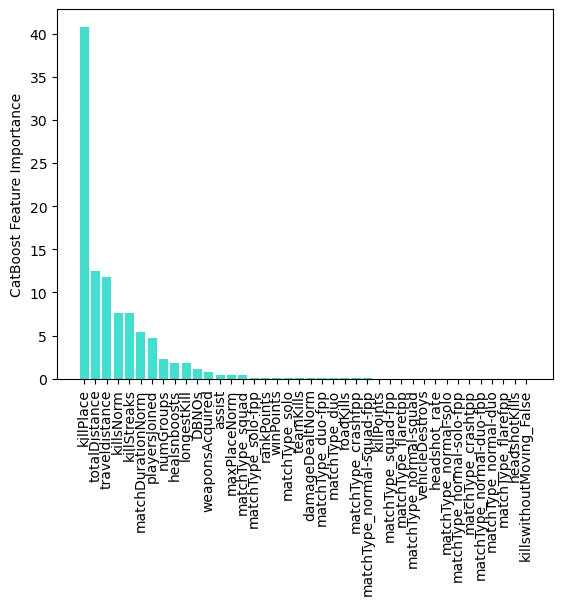

In [54]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()


In [55]:
pred = model.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93
